In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
pd.set_option("display.max_columns", None)   # show all columns
pd.set_option("display.max_rows", None)      # show all rows if needed

In [13]:
# CLEANUP DATA

# Read file, skipping the first two metadata rows
df = pd.read_csv("SquishyData.csv", skiprows=[1,2])

# Drop the first 17 columns with unneeded data
df = df.iloc[:, 17:]

# Drop row 12, because of missing data and reset the indexing
df = df.drop(index=12)
df = df.reset_index(drop=True)

df

,Alter,Geschlecht,Bildungsgrad,Bildungsgrad_9_TEXT,Tätigkeit,Technische Affinität,KI Nutzerverhalten,UEQ 1 (Standard)_1,UEQ 1 (Standard)_2,UEQ 1 (Standard)_3,UEQ 1 (Standard)_4,UEQ 1 (Standard)_5,UEQ 1 (Standard)_6,UEQ 1 (Standard)_7,UEQ 1 (Standard)_8,UEQ 1 (Standard)_9,UEQ 1 (Standard)_10,UEQ 1 (Standard)_11,UEQ 1 (Standard)_12,UEQ 1 (Standard)_13,UEQ 1 (Standard)_14,UEQ 1 (Standard)_15,UEQ 1 (Standard)_16,UEQ 1 (Standard)_17,UEQ 1 (Standard)_18,UEQ 1 (Standard)_19,UEQ 1 (Standard)_20,UEQ 1 (Standard)_21,UEQ 1 (Standard)_22,UEQ 1 (Standard)_23,UEQ 1 (Standard)_24,UEQ 1 (Standard)_25,UEQ 1 (Standard)_26,UES 1 (Standard)_1,UES 1 (Standard)_2,UES 1 (Standard)_3,UES 1 (Standard)_4,UES 1 (Standard)_5,UES 1 (Standard)_6,UES 1 (Standard)_7,UES 1 (Standard)_8,UES 1 (Standard)_9,UES 1 (Standard)_10,UES 1 (Standard)_11,UES 1 (Standard)_12,AF 1 (Standard),UEQ 2 (Standard)_1,UEQ 2 (Standard)_2,UEQ 2 (Standard)_3,UEQ 2 (Standard)_4,UEQ 2 (Standard)_5,UEQ 2 (Standard)_6,UEQ 2 (Standard)_7,UEQ 2 (Standard)_8,UEQ 2 (Standard)_9,UEQ 2 (Standard)_10,UEQ 2 (Standard)_11,UEQ 2 (Standard)_12,UEQ 2 (Standard)_13,UEQ 2 (Standard)_14,UEQ 2 (Standard)_15,UEQ 2 (Standard)_16,UEQ 2 (Standard)_17,UEQ 2 (Standard)_18,UEQ 2 (Standard)_19,UEQ 2 (Standard)_20,UEQ 2 (Standard)_21,UEQ 2 (Standard)_22,UEQ 2 (Standard)_23,UEQ 2 (Standard)_24,UEQ 2 (Standard)_25,UEQ 2 (Standard)_26,UES 2 (Standard)_1,UES 2 (Standard)_2,UES 2 (Standard)_3,UES 2 (Standard)_4,UES 2 (Standard)_5,UES 2 (Standard)_6,UES 2 (Standard)_7,UES 2 (Standard)_8,UES 2 (Standard)_9,UES 2 (Standard)_10,UES 2 (Standard)_11,UES 2 (Standard)_12,AF 2 (Standard),UEQ 1 (Squishy)_1,UEQ 1 (Squishy)_2,UEQ 1 (Squishy)_3,UEQ 1 (Squishy)_4,UEQ 1 (Squishy)_5,UEQ 1 (Squishy)_6,UEQ 1 (Squishy)_7,UEQ 1 (Squishy)_8,UEQ 1 (Squishy)_9,UEQ 1 (Squishy)_10,UEQ 1 (Squishy)_11,UEQ 1 (Squishy)_12,UEQ 1 (Squishy)_13,UEQ 1 (Squishy)_14,UEQ 1 (Squishy)_15,UEQ 1 (Squishy)_16,UEQ 1 (Squishy)_17,UEQ 1 (Squishy)_18,UEQ 1 (Squishy)_19,UEQ 1 (Squishy)_20,UEQ 1 (Squishy)_21,UEQ 1 (Squishy)_22,UEQ 1 (Squishy)_23,UEQ 1 (Squishy)_24,UEQ 1 (Squishy)_25,UEQ 1 (Squishy)_26,UES 1 (Squishy)_1,UES 1 (Squishy)_2,UES 1 (Squishy)_3,UES 1 (Squishy)_4,UES 1 (Squishy)_5,UES 1 (Squishy)_6,UES 1 (Squishy)_7,UES 1 (Squishy)_8,UES 1 (Squishy)_9,UES 1 (Squishy)_10,UES 1 (Squishy)_11,UES 1 (Squishy)_12,AF 1 (Squishy),UEQ 2 (Squishy)_1,UEQ 2 (Squishy)_2,UEQ 2 (Squishy)_3,UEQ 2 (Squishy)_4,UEQ 2 (Squishy)_5,UEQ 2 (Squishy)_6,UEQ 2 (Squishy)_7,UEQ 2 (Squishy)_8,UEQ 2 (Squishy)_9,UEQ 2 (Squishy)_10,UEQ 2 (Squishy)_11,UEQ 2 (Squishy)_12,UEQ 2 (Squishy)_13,UEQ 2 (Squishy)_14,UEQ 2 (Squishy)_15,UEQ 2 (Squishy)_16,UEQ 2 (Squishy)_17,UEQ 2 (Squishy)_18,UEQ 2 (Squishy)_19,UEQ 2 (Squishy)_20,UEQ 2 (Squishy)_21,UEQ 2 (Squishy)_22,UEQ 2 (Squishy)_23,UEQ 2 (Squishy)_24,UEQ 2 (Squishy)_25,UEQ 2 (Squishy)_26,UES 2 (Squishy)_1,UES 2 (Squishy)_2,UES 2 (Squishy)_3,UES 2 (Squishy)_4,UES 2 (Squishy)_5,UES 2 (Squishy)_6,UES 2 (Squishy)_7,UES 2 (Squishy)_8,UES 2 (Squishy)_9,UES 2 (Squishy)_10,UES 2 (Squishy)_11,UES 2 (Squishy)_12,AF 2 (Squishy),Durchlauf,Aufgabe 1,Aufgabe 2,Durchlauf 1 Gewählt = Standard,Aufgabe 1 Gewählt,Aufgabe 2 Gewählt,Durchlauf 1 Gewählt = Squishy
0,21,2,5,NaN,Student,2,1,2.0,7.0,6.0,1.0,6.0,2.0,2.0,6.0,3.0,6.0,6.0,4.0,7.0,5.0,1.0,5.0,6.0,6.0,1.0,3.0,1.0,7.0,1.0,5.0,3.0,2.0,3.0,2.0,2.0,5.0,3.0,3.0,2.0,3.0,3.0,2.0,2.0,2.0,1.0,5.0,6.0,6.0,1.0,3.0,2.0,2.0,6.0,1.0,7.0,4.0,4.0,6.0,4.0,1.0,5.0,3.0,6.0,2.0,1.0,2.0,6.0,2.0,4.0,4.0,2.0,3.0,2.0,4.0,4.0,2.0,3.0,2.0,2.0,2.0,3.0,4.0,2.0,4.0,7,6,2,1,3,6,6,5,2,2,6,2,7,6,6,7,2,1,5,5,1,5,1,4,1,6,5,5,5,1,1,3,4,4,4,4,4,5,4,7,7,2,1,2,7,7,6,1,2,6,1,7,6,6,6,2,1,1,5,1,5,2,3,2,6,5,5,5,1,1,3,4,4,4,4,5,5,2,Squishy,Buchcover,Witz,NaN,Buchcover,Witz,NaN
1,24,1,5,NaN,Student,4,2,5.0,6.0,5.0,3.0,3.0,3.0,3.0,6.0,2.0,2.0,4.0,3.0,5.0,4.0,5.0,5.0,3.0,3.0,3.0,7.0,1.0,4.0,3.0,2.0,1.0,5.0,1.0,2.0,2.0,1.0,5.0,3.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,6.0,7.0,3.0,2.0,2.0,7.0,7.0,3.0,1.0,5.0,5.0,3.0,6.0,5.0,3.0,6.0,3.0,5.0,4.0,5.0,1.0,6.0,3.0,4.0,3.

In [14]:
# remove all columns except UES columns
df_UES = df.filter(regex=r'^UES', axis=1)

df_UES = df_UES.astype(int)
df_UES

,UES 1 (Standard)_1,UES 1 (Standard)_2,UES 1 (Standard)_3,UES 1 (Standard)_4,UES 1 (Standard)_5,UES 1 (Standard)_6,UES 1 (Standard)_7,UES 1 (Standard)_8,UES 1 (Standard)_9,UES 1 (Standard)_10,UES 1 (Standard)_11,UES 1 (Standard)_12,UES 2 (Standard)_1,UES 2 (Standard)_2,UES 2 (Standard)_3,UES 2 (Standard)_4,UES 2 (Standard)_5,UES 2 (Standard)_6,UES 2 (Standard)_7,UES 2 (Standard)_8,UES 2 (Standard)_9,UES 2 (Standard)_10,UES 2 (Standard)_11,UES 2 (Standard)_12,UES 1 (Squishy)_1,UES 1 (Squishy)_2,UES 1 (Squishy)_3,UES 1 (Squishy)_4,UES 1 (Squishy)_5,UES 1 (Squishy)_6,UES 1 (Squishy)_7,UES 1 (Squishy)_8,UES 1 (Squishy)_9,UES 1 (Squishy)_10,UES 1 (Squishy)_11,UES 1 (Squishy)_12,UES 2 (Squishy)_1,UES 2 (Squishy)_2,UES 2 (Squishy)_3,UES 2 (Squishy)_4,UES 2 (Squishy)_5,UES 2 (Squishy)_6,UES 2 (Squishy)_7,UES 2 (Squishy)_8,UES 2 (Squishy)_9,UES 2 (Squishy)_10,UES 2 (Squishy)_11,UES 2 (Squishy)_12
0,3,2,2,5,3,3,2,3,3,2,2,2,3,2,4,4,2,3,2,2,2,3,4,2,5,5,5,1,1,3,4,4,4,4,4,5,5,5,5,1,1,3,4,4,4,4,5,5
1,1,2,2,1,5,3,4,5,4,4,4,4,2,4,2,2,2,2,4,2,4,4,3,5,2,2,2,2,2,2,5,5,5,4,4,5,2,2,2,2,1,2,4,4,4,5,4,4
2,2,4,4,1,1,3,4,4,3,4,3,4,3,4,4,1,1,3,4,5,3,5,5,5,4,5,5,1,1,3,5,5,4,5,5,5,4,5,5,1,1,3,5,5,5,4,5,5
3,2,3,4,1,1,3,2,2,2,3,3,2,2,3,2,1,2,3,2,2,3,3,2,4,2,3,5,1,1,2,4,5,5,2,4,5,2,3,4,1,1,3,4,4,5,2,4,5
4,3,2,4,2,2,3,4,5,4,4,4,4,3,2,3,2,2,2,4,4,4,4,4,3,3,2,3,4,3,2,4,5,4,4,4,3,3,2,4,4,3,3,4,4,5,4,5,4
5,5,5,5,5,5,5,4,1,5,5,5,5,5,5,4,1,1,5,5,5,5,5,5,5,4,4,4,2,1,4,4,2,4,4,4,4,5,5,1,1,5,3,5,5,5,5,5,5
6,1,3,3,3,1,1,1,1,3,3,1,1,3,3,3,3,3,3,3,2,4,4,3,3,5,5,3,1,1,3,5,4,5,5,5,5,3,5,3,1,1,3,5,5,5,5,5,5
7,1,1,2,1,2,1,2,2,2,3,3,2,2,3,2,4,2,4,2,3,2,2,2,2,3,3,3,1,2,1,4,4,3,3,3,4,3,3,3,1,1,1,4,4,3,3,3,4
8,2,4,3,3,2,2,4,3,3,4,3,4,3,4,3,3,2,3,4,4,4,4,3,4,2,4,3,2,2,2,4,4,4,4,4,4,3,4,3,2,2,3,4,4,2,4,3,4
9,3,3,3,1,3,3,3,3,4,4,3,4,3,4,4,1,2,4,3,4,2,4,4,4,2,5,4,4,1,3,4,2,4,4,4,4,3,4,4,4,1,3,4,3,4,4,3,4


In [15]:
# List of UES items to invert
items_to_invert = [4, 5, 6]

# find columns that match those item numbers (works for both Standard and Squishy)
cols_to_invert = [col for col in df_UES.columns 
                  if col.split('_')[-1].isdigit() and int(col.split('_')[-1]) in items_to_invert]

# invert these columns for a 1–5 scale
df_UES.loc[:, cols_to_invert] = 6 - df_UES[cols_to_invert]

df_UES

,UES 1 (Standard)_1,UES 1 (Standard)_2,UES 1 (Standard)_3,UES 1 (Standard)_4,UES 1 (Standard)_5,UES 1 (Standard)_6,UES 1 (Standard)_7,UES 1 (Standard)_8,UES 1 (Standard)_9,UES 1 (Standard)_10,UES 1 (Standard)_11,UES 1 (Standard)_12,UES 2 (Standard)_1,UES 2 (Standard)_2,UES 2 (Standard)_3,UES 2 (Standard)_4,UES 2 (Standard)_5,UES 2 (Standard)_6,UES 2 (Standard)_7,UES 2 (Standard)_8,UES 2 (Standard)_9,UES 2 (Standard)_10,UES 2 (Standard)_11,UES 2 (Standard)_12,UES 1 (Squishy)_1,UES 1 (Squishy)_2,UES 1 (Squishy)_3,UES 1 (Squishy)_4,UES 1 (Squishy)_5,UES 1 (Squishy)_6,UES 1 (Squishy)_7,UES 1 (Squishy)_8,UES 1 (Squishy)_9,UES 1 (Squishy)_10,UES 1 (Squishy)_11,UES 1 (Squishy)_12,UES 2 (Squishy)_1,UES 2 (Squishy)_2,UES 2 (Squishy)_3,UES 2 (Squishy)_4,UES 2 (Squishy)_5,UES 2 (Squishy)_6,UES 2 (Squishy)_7,UES 2 (Squishy)_8,UES 2 (Squishy)_9,UES 2 (Squishy)_10,UES 2 (Squishy)_11,UES 2 (Squishy)_12
0,3,2,2,1,3,3,2,3,3,2,2,2,3,2,4,2,4,3,2,2,2,3,4,2,5,5,5,5,5,3,4,4,4,4,4,5,5,5,5,5,5,3,4,4,4,4,5,5
1,1,2,2,5,1,3,4,5,4,4,4,4,2,4,2,4,4,4,4,2,4,4,3,5,2,2,2,4,4,4,5,5,5,4,4,5,2,2,2,4,5,4,4,4,4,5,4,4
2,2,4,4,5,5,3,4,4,3,4,3,4,3,4,4,5,5,3,4,5,3,5,5,5,4,5,5,5,5,3,5,5,4,5,5,5,4,5,5,5,5,3,5,5,5,4,5,5
3,2,3,4,5,5,3,2,2,2,3,3,2,2,3,2,5,4,3,2,2,3,3,2,4,2,3,5,5,5,4,4,5,5,2,4,5,2,3,4,5,5,3,4,4,5,2,4,5
4,3,2,4,4,4,3,4,5,4,4,4,4,3,2,3,4,4,4,4,4,4,4,4,3,3,2,3,2,3,4,4,5,4,4,4,3,3,2,4,2,3,3,4,4,5,4,5,4
5,5,5,5,1,1,1,4,1,5,5,5,5,5,5,4,5,5,1,5,5,5,5,5,5,4,4,4,4,5,2,4,2,4,4,4,4,5,5,1,5,1,3,5,5,5,5,5,5
6,1,3,3,3,5,5,1,1,3,3,1,1,3,3,3,3,3,3,3,2,4,4,3,3,5,5,3,5,5,3,5,4,5,5,5,5,3,5,3,5,5,3,5,5,5,5,5,5
7,1,1,2,5,4,5,2,2,2,3,3,2,2,3,2,2,4,2,2,3,2,2,2,2,3,3,3,5,4,5,4,4,3,3,3,4,3,3,3,5,5,5,4,4,3,3,3,4
8,2,4,3,3,4,4,4,3,3,4,3,4,3,4,3,3,4,3,4,4,4,4,3,4,2,4,3,4,4,4,4,4,4,4,4,4,3,4,3,4,4,3,4,4,2,4,3,4
9,3,3,3,5,3,3,3,3,4,4,3,4,3,4,4,5,4,2,3,4,2,4,4,4,2,5,4,2,5,3,4,2,4,4,4,4,3,4,4,2,5,3,4,3,4,4,3,4


In [16]:
# Dictionary to hold new columns
mean_cols = {}

# Calculate mean columns
for i in range(1, 13):
    mean_cols[f'UES (Standard)_{i}_mean'] = df_UES[[f'UES 1 (Standard)_{i}', f'UES 2 (Standard)_{i}']].mean(axis=1)
    mean_cols[f'UES (Squishy)_{i}_mean'] = df_UES[[f'UES 1 (Squishy)_{i}', f'UES 2 (Squishy)_{i}']].mean(axis=1)

# Combine everything into a new DataFrame
df_means = pd.DataFrame(mean_cols)

# Optional: reorder columns
standard_cols = [c for c in df_means.columns if 'Standard' in c]
squishy_cols = [c for c in df_means.columns if 'Squishy' in c]
df_means = df_means[standard_cols + squishy_cols]

df_means

,UES (Standard)_1_mean,UES (Standard)_2_mean,UES (Standard)_3_mean,UES (Standard)_4_mean,UES (Standard)_5_mean,UES (Standard)_6_mean,UES (Standard)_7_mean,UES (Standard)_8_mean,UES (Standard)_9_mean,UES (Standard)_10_mean,UES (Standard)_11_mean,UES (Standard)_12_mean,UES (Squishy)_1_mean,UES (Squishy)_2_mean,UES (Squishy)_3_mean,UES (Squishy)_4_mean,UES (Squishy)_5_mean,UES (Squishy)_6_mean,UES (Squishy)_7_mean,UES (Squishy)_8_mean,UES (Squishy)_9_mean,UES (Squishy)_10_mean,UES (Squishy)_11_mean,UES (Squishy)_12_mean
0,3.0,2.0,3.0,1.5,3.5,3.0,2.0,2.5,2.5,2.5,3.0,2.0,5.0,5.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,4.0,4.5,5.0
1,1.5,3.0,2.0,4.5,2.5,3.5,4.0,3.5,4.0,4.0,3.5,4.5,2.0,2.0,2.0,4.0,4.5,4.0,4.5,4.5,4.5,4.5,4.0,4.5
2,2.5,4.0,4.0,5.0,5.0,3.0,4.0,4.5,3.0,4.5,4.0,4.5,4.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,4.5,4.5,5.0,5.0
3,2.0,3.0,3.0,5.0,4.5,3.0,2.0,2.0,2.5,3.0,2.5,3.0,2.0,3.0,4.5,5.0,5.0,3.5,4.0,4.5,5.0,2.0,4.0,5.0
4,3.0,2.0,3.5,4.0,4.0,3.5,4.0,4.5,4.0,4.0,4.0,3.5,3.0,2.0,3.5,2.0,3.0,3.5,4.0,4.5,4.5,4.0,4.5,3.5
5,5.0,5.0,4.5,3.0,3.0,1.0,4.5,3.0,5.0,5.0,5.0,5.0,4.5,4.5,2.5,4.5,3.0,2.5,4.5,3.5,4.5,4.5,4.5,4.5
6,2.0,3.0,3.0,3.0,4.0,4.0,2.0,1.5,3.5,3.5,2.0,2.0,4.0,5.0,3.0,5.0,5.0,3.0,5.0,4.5,5.0,5.0,5.0,5.0
7,1.5,2.0,2.0,3.5,4.0,3.5,2.0,2.5,2.0,2.5,2.5,2.0,3.0,3.0,3.0,5.0,4.5,5.0,4.0,4.0,3.0,3.0,3.0,4.0
8,2.5,4.0,3.0,3.0,4.0,3.5,4.0,3.5,3.5,4.0,3.0,4.0,2.5,4.0,3.0,4.0,4.0,3.5,4.0,4.0,3.0,4.0,3.5,4.0
9,3.0,3.5,3.5,5.0,3.5,2.5,3.0,3.5,3.0,4.0,3.5,4.0,2.5,4.5,4.0,2.0,5.0,3.0,4.0,2.5,4.0,4.0,3.5,4.0


In [17]:
# Start a new DataFrame without PID
df_scores = pd.DataFrame()

# Define scales and corresponding item keywords
scales_keywords = {
    "Focussed Attention": ["_1_mean", "_2_mean", "_3_mean"],
    "Percived Usability": ["_4_mean", "_5_mean", "_6_mean"],
    "Aesthetic Appeal": ["_7_mean", "_8_mean", "_9_mean"],
    "Reward Factor": ["_10_mean", "_11_mean", "_12_mean"]
}

# Calculate subscale means for Standard and Squishy
for scale, keywords in scales_keywords.items():
    # Standard
    standard_cols = [col for col in df_means.columns if "Standard" in col and any(k in col for k in keywords)]
    df_scores[f"{scale}_Standard"] = df_means[standard_cols].mean(axis=1)

    # Squishy
    squishy_cols = [col for col in df_means.columns if "Squishy" in col and any(k in col for k in keywords)]
    df_scores[f"{scale}_Squishy"] = df_means[squishy_cols].mean(axis=1)

# Calculate total mean per condition
df_scores['Total_Standard'] = df_means[[col for col in df_means.columns if 'UES (Standard)' in col and '_mean' in col]].mean(axis=1)
df_scores['Total_Squishy'] = df_means[[col for col in df_means.columns if 'UES (Squishy)' in col and '_mean' in col]].mean(axis=1)

# Display the cleaned DataFrame
df_scores

,Focussed Attention_Standard,Focussed Attention_Squishy,Percived Usability_Standard,Percived Usability_Squishy,Aesthetic Appeal_Standard,Aesthetic Appeal_Squishy,Reward Factor_Standard,Reward Factor_Squishy,Total_Standard,Total_Squishy
0,2.666667,5.000000,2.666667,4.333333,2.333333,4.000000,2.500000,4.500000,2.541667,4.458333
1,2.166667,2.000000,3.500000,4.166667,3.833333,4.500000,4.000000,4.333333,3.375000,3.750000
2,3.500000,4.666667,4.333333,4.333333,3.833333,4.833333,4.333333,4.833333,4.000000,4.666667
3,2.666667,3.166667,4.166667,4.500000,2.166667,4.500000,2.833333,3.666667,2.958333,3.958333
4,2.833333,2.833333,3.833333,2.833333,4.166667,4.333333,3.833333,4.000000,3.666667,3.500000
5,4.833333,3.833333,2.333333,3.333333,4.166667,4.166667,5.000000,4.500000,4.083333,3.958333
6,2.666667,4.000000,3.666667,4.333333,2.333333,4.833333,2.500000,5.000000,2.791667,4.541667
7,1.833333,3.000000,3.666667,4.833333,2.166667,3.666667,2.333333,3.333333,2.500000,3.708333
8,3.166667,3.166667,3.500000,3.833333,3.666667,3.666667,3.666667,3.833333,3.500000,3.625000
9,3.333333,3.666667,3.666667,3.333333,3.166667,3.500000,3.833333,3.833333,3.500000,3.583333


In [34]:
# Compute the mean for each column
mean_scores = df_scores.mean()

mean_sd = df_scores.std()

print("SCORE:")
print(mean_scores)
print("STANDARD DEVIATION:")
print(mean_sd)

SCORE:
Focussed Attention_Standard    2.726190
Focussed Attention_Squishy     3.607143
Percived Usability_Standard    3.547619
Percived Usability_Squishy     3.988095
Aesthetic Appeal_Standard      2.857143
Aesthetic Appeal_Squishy       4.178571
Reward Factor_Standard         3.119048
Reward Factor_Squishy          4.178571
Total_Standard                 3.062500
Total_Squishy                  3.988095
dtype: float64
STANDARD DEVIATION:
Focussed Attention_Standard    0.804918
Focussed Attention_Squishy     0.775168
Percived Usability_Standard    0.532807
Percived Usability_Squishy     0.628607
Aesthetic Appeal_Standard      0.905485
Aesthetic Appeal_Squishy       0.671343
Reward Factor_Standard         0.961722
Reward Factor_Squishy          0.504104
Total_Standard                 0.616014
Total_Squishy                  0.417124
dtype: float64


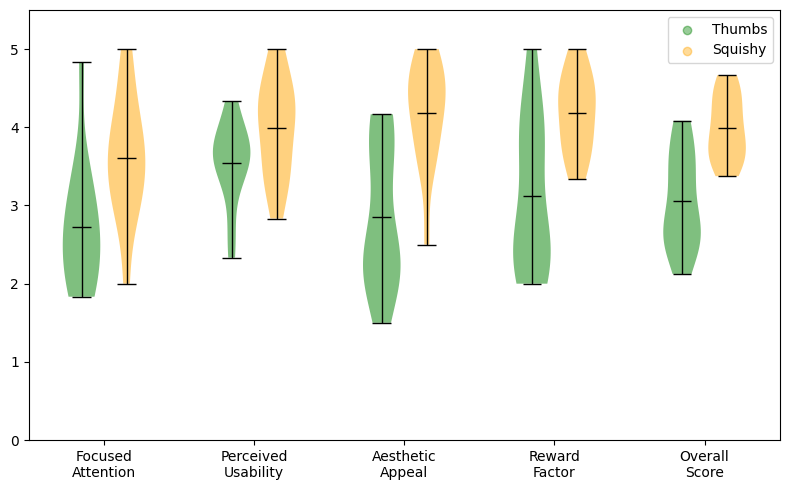

In [29]:
# Categories (for x-axis labels)
categories = ["Focused\nAttention", "Perceived\nUsability", "Aesthetic\nAppeal", "Reward\nFactor", "Overall\nScore"]

# Extract Standard and Squishy data
standard_data = [
    df_scores['Focussed Attention_Standard'],
    df_scores['Percived Usability_Standard'],
    df_scores['Aesthetic Appeal_Standard'],
    df_scores['Reward Factor_Standard'],
    df_scores['Total_Standard']
]

squishy_data = [
    df_scores['Focussed Attention_Squishy'],
    df_scores['Percived Usability_Squishy'],
    df_scores['Aesthetic Appeal_Squishy'],
    df_scores['Reward Factor_Squishy'],
    df_scores['Total_Squishy']
]

# Figure setup
plt.figure(figsize=(8, 5))

# Positions for side-by-side violins
positions_standard = np.arange(1, len(categories)+1) - 0.15  # left
positions_squishy = np.arange(1, len(categories)+1) + 0.15   # right
width = 0.25

# Plot Standard
vp_std = plt.violinplot(standard_data, positions=positions_standard, widths=width, showmeans=True)
# Plot Squishy
vp_sq = plt.violinplot(squishy_data, positions=positions_squishy, widths=width, showmeans=True)

# Customize x-axis
plt.xticks(range(1, len(categories)+1), categories)

# Customize median/mean/min/max lines
for vp in [vp_std, vp_sq]:
    for partname in ('cmedians', 'cmeans', 'cmins', 'cmaxes', 'cbars'):
        part = vp.get(partname)
        if part:
            part.set_edgecolor('black')
            part.set_linewidth(1)

# Set violin colors
for pc in vp_std['bodies']:
    pc.set_facecolor('green')
    pc.set_alpha(0.5)

for pc in vp_sq['bodies']:
    pc.set_facecolor('orange')
    pc.set_alpha(0.5)

# Y-axis
plt.ylim(0, 5.5)

# Legend
plt.scatter([], [], color='green', alpha=0.4, label='Thumbs')
plt.scatter([], [], color='orange', alpha=0.4, label='Squishy')
plt.legend()

# Save as PDF
plt.tight_layout()
plt.savefig("output/UES_violin_plot.pdf", format='pdf', bbox_inches='tight')

plt.show()

In [20]:
# Shapiro - Wilk Test on Scores

from scipy.stats import shapiro

# Dictionary to hold results
shapiro_results = {}

# Loop over all columns in df_scores
for col in df_scores.columns:
    stat, p = shapiro(df_scores[col])
    shapiro_results[col] = {'W-statistic': stat, 'p-value': p}

# Convert results to DataFrame
shapiro_df = pd.DataFrame(shapiro_results).T  # transpose for readability

# Add a column to indicate normality
shapiro_df['Normal?'] = shapiro_df['p-value'] > 0.05

# Display the results
print(shapiro_df)


                             W-statistic   p-value  Normal?
Focussed Attention_Standard     0.885560  0.069785     True
Focussed Attention_Squishy      0.984031  0.991798     True
Percived Usability_Standard     0.902902  0.124275     True
Percived Usability_Squishy      0.964256  0.792050     True
Aesthetic Appeal_Standard       0.856179  0.026972    False
Aesthetic Appeal_Squishy        0.909482  0.154879     True
Reward Factor_Standard          0.891324  0.084464     True
Reward Factor_Squishy           0.974850  0.933917     True
Total_Standard                  0.925896  0.267028     True
Total_Squishy                   0.949711  0.556225     True


In [21]:
# Shapiro - Wilk Test on Differences between Standard Condition and Squishy Condition
# https://youtu.be/e0lum-6vuw4?si=GMvssl3vWHBo5FO7&t=508

# Define the scale names (adapt these if your column names differ slightly)
scales = [
    "Focussed Attention",
    "Percived Usability",
    "Aesthetic Appeal",
    "Reward Factor",
    "Total"
]

# Dictionary to store results
results = {}

for scale in scales:
    # Compute the difference between Squishy and Standard
    diff = df_scores[f"{scale}_Squishy"] - df_scores[f"{scale}_Standard"]
    
    # Perform the Shapiro–Wilk test
    stat, p_value = shapiro(diff)
    
    # Store the results
    results[scale] = {
        "p-value": p_value,
        "Normally distributed?": "Yes" if p_value > 0.05 else "No"
    }

# Create a DataFrame for better readability
df_normality = pd.DataFrame(results).T

print(df_normality)

                     p-value Normally distributed?
Focussed Attention  0.929098                   Yes
Percived Usability  0.974479                   Yes
Aesthetic Appeal    0.198104                   Yes
Reward Factor       0.262503                   Yes
Total               0.336974                   Yes


In [24]:
from scipy.stats import ttest_rel

# Dictionary to store t-test results
ttest_results = {}

for scale in ["Focussed Attention", "Percived Usability", "Aesthetic Appeal", "Reward Factor", "Total"]:
    # Paired t-test between Squishy and Standard
    t_stat, p_value = ttest_rel(df_scores[f"{scale}_Squishy"], df_scores[f"{scale}_Standard"])
    ttest_results[scale] = {"t-statistic": t_stat, "p-value": p_value, "Significant?": p_value < 0.05}

# Convert results to DataFrame for display
ttest_df = pd.DataFrame(ttest_results).T
print(ttest_df)

                   t-statistic   p-value Significant?
Focussed Attention    3.328899  0.005437         True
Percived Usability    2.249506  0.042446         True
Aesthetic Appeal      4.407571  0.000708         True
Reward Factor         3.993432  0.001531         True
Total                  4.37029  0.000758         True


In [25]:
# Calculate Cohen's d for paired samples (Standard vs Squishy)
def cohens_d_paired(x, y):
    diff = y - x
    return diff.mean() / diff.std(ddof=1)

cohens_d_results = {}
for scale in scales:
    x = df_scores[f"{scale}_Standard"]
    y = df_scores[f"{scale}_Squishy"]
    cohens_d_results[scale] = cohens_d_paired(x, y)

# Display results
print("Cohen's d for paired differences:")
for scale, d in cohens_d_results.items():
    print(f"{scale}: {d:.3f}")

Cohen's d for paired differences:
Focussed Attention: 0.890
Percived Usability: 0.601
Aesthetic Appeal: 1.178
Reward Factor: 1.067
Total: 1.168


In [26]:
from pingouin import cronbach_alpha

scales_keywords = {
    "Focussed Attention": ["_1_mean", "_2_mean", "_3_mean"],
    "Percived Usability": ["_4_mean", "_5_mean", "_6_mean"],
    "Aesthetic Appeal": ["_7_mean", "_8_mean", "_9_mean"],
    "Reward Factor": ["_10_mean", "_11_mean", "_12_mean"]
}

results = {}

for scale, keywords in scales_keywords.items():
    # For Standard condition
    standard_cols = [col for col in df_means.columns if "Standard" in col and any(k in col for k in keywords)]
    alpha_standard, _ = cronbach_alpha(df_means[standard_cols])

    # For Squishy condition
    squishy_cols = [col for col in df_means.columns if "Squishy" in col and any(k in col for k in keywords)]
    alpha_squishy, _ = cronbach_alpha(df_means[squishy_cols])

    results[scale] = {
        "Cronbach α (Standard)": round(alpha_standard, 3),
        "Cronbach α (Squishy)": round(alpha_squishy, 3)
    }

# Display as DataFrame
import pandas as pd
df_alpha = pd.DataFrame(results).T
print(df_alpha)

                    Cronbach α (Standard)  Cronbach α (Squishy)
Focussed Attention                  0.763                 0.724
Percived Usability                  0.366                 0.345
Aesthetic Appeal                    0.851                 0.756
Reward Factor                       0.926                 0.607
